# 特徴選択（Feature Selection）
特徴選択で特徴量を減らすことによって、予測に必要のない特徴を取り除いて、重要な特徴だけを残すことができます。  
- 学習データを縮小することによって学習にかかる時間を短縮できる。  
- モデルの構造を単純化し理解しやすくできる。  
- 過学習を防ぐことができる。

## まずは全部の特徴量を使って機械学習

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('wdbc.data', header=None,
                 names=['id','diagnosis',
                        'radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean',
                        'compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean',
                        'radius_se','texture_se','perimeter_se','area_se','smoothness_se',
                        'compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se',
                        'radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst',
                        'compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst'])

In [3]:
X = df.iloc[:,2:] # 機械学習では、このXを「特徴量」と呼びます。

In [4]:
y = df.iloc[:,1].replace({'M':0, 'B':1})

In [5]:
# データを訓練用とテスト用に分ける
from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(n_splits=1, train_size=0.8, test_size=0.2, random_state=0)
train_index, test_index = next(ss.split(X, y))
X_train, X_test = X.iloc[train_index], X.iloc[test_index]
y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [6]:
# 特徴量を標準化する
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)

In [7]:
# 標準化した特徴量で機械学習する（パラメーターCを変えながら）
from sklearn import linear_model
import numpy as np
from sklearn.model_selection import cross_val_score

clf = linear_model.LogisticRegression()
C_range_exp = np.linspace(start=-30, stop=10, num=41)
C_range = 10 ** C_range_exp
all_scores_mean = []
all_scores_std = []
for C in C_range:
    clf.C = C
    scores = cross_val_score(clf, X_train_scale, y_train, cv=10)
    all_scores_mean.append(scores.mean())
    all_scores_std.append(scores.std())

C:\Users\mxs080\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mxs080\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\mxs080\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mxs080\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\mxs080\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mxs080\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\mxs080\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mxs080\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

Text(0.5, 1.0, 'Accuracy for different values of C')

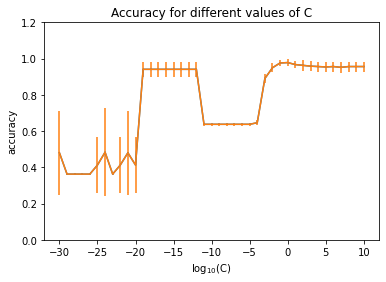

In [8]:
# パラメーターごとのスコアを図示する
import matplotlib.pyplot as plt
plt.plot(C_range_exp, all_scores_mean)
plt.errorbar(C_range_exp, all_scores_mean, yerr=all_scores_std)
plt.ylim(0, 1.2)
plt.ylabel('accuracy')
plt.xlabel('$\log_{10}$(C)')
plt.title('Accuracy for different values of C')

In [9]:
# 後でnp.argmaxを使いたいので、リストからnumpyアレイに変換しておく。
all_scores_mean = np.array(all_scores_mean)
all_scores_std = np.array(all_scores_std)

In [10]:
all_scores_mean.max()

0.9780676328502416

In [11]:
max_index = np.argmax(all_scores_mean)
max_index

30

In [12]:
# 最適なパラメーターをテストデータに適用する
clf.C = 10 ** C_range_exp[max_index]
clf.fit(X_train_scale, y_train)
clf.score(X_test_scale, y_test)

0.9649122807017544

## 特徴選択をして機械学習

In [13]:
from sklearn.feature_selection import SelectKBest
skb = SelectKBest(k=20) # 特徴量をk次元にする
skb.fit(X_train_scale, y_train)
X_train_select = skb.transform(X_train_scale)
X_test_select = skb.transform(X_test_scale)

In [14]:
X_train_scale.shape, X_train_select.shape

((455, 30), (455, 20))

In [15]:
X_train.columns # 元の特徴量の名前

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [16]:
skb.get_support() # どの特徴量が選択されたか（True）、選択されなかったか（False）

array([ True,  True,  True,  True, False,  True,  True,  True, False,
       False,  True, False,  True,  True, False, False, False,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False])

In [17]:
X_train.columns[skb.get_support()] # 選択された特徴量

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'compactness_mean', 'concavity_mean', 'concave points_mean',
       'radius_se', 'perimeter_se', 'area_se', 'concave points_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst'],
      dtype='object')

In [18]:
X_train.columns[~skb.get_support()] # 選択されなかった特徴量

Index(['smoothness_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'texture_se', 'smoothness_se', 'compactness_se', 'concavity_se',
       'symmetry_se', 'fractal_dimension_se', 'fractal_dimension_worst'],
      dtype='object')

In [19]:
# 特徴選択してから機械学習する（パラメーターCを変えながら）
clf = linear_model.LogisticRegression()
C_range_exp = np.linspace(start=-30, stop=10, num=41)
C_range = 10 ** C_range_exp
all_scores_mean = []
all_scores_std = []
for C in C_range:
    clf.C = C
    scores = cross_val_score(clf, X_train_select, y_train, cv=10)
    all_scores_mean.append(scores.mean())
    all_scores_std.append(scores.std())

C:\Users\mxs080\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mxs080\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\mxs080\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mxs080\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\mxs080\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mxs080\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\mxs080\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mxs080\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\mxs080\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mxs080\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

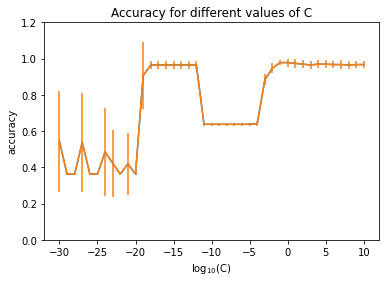

In [20]:
# パラメーターごとのスコアを図示する
import matplotlib.pyplot as plt
plt.plot(C_range_exp, all_scores_mean)
plt.errorbar(C_range_exp, all_scores_mean, yerr=all_scores_std)
plt.ylim(0, 1.2)
plt.ylabel('accuracy')
plt.xlabel('$\log_{10}$(C)')
plt.title('Accuracy for different values of C')
plt.show()

In [21]:
# 後でnp.argmaxを使いたいので、リストからnumpyアレイに変換しておく。
all_scores_mean = np.array(all_scores_mean)
all_scores_std = np.array(all_scores_std)

In [22]:
all_scores_mean.max()

0.9780676328502416

In [23]:
max_index = np.argmax(all_scores_mean)
max_index

29

In [24]:
# 最適なパラメーターをテストデータに適用する
clf.C = 10 ** C_range_exp[max_index]
clf.fit(X_train_select, y_train)
clf.score(X_test_select, y_test)

0.9736842105263158

## 結果について
特徴量を30個から20個に減らしてもスコアは悪くなりませんでした。  
減らした方がかえってよくなることもあります。  
今回の結果でもそうなっていますが、ただの偶然の可能性もありますので  
ss = ShuffleSplit(n_splits=1, train_size=0.8, test_size=0.2, random_state=0)  
のrandom_stateを色々変えて試してみてください。  
skb = SelectKBest(k=20)  
のkの値も変えてみるとスコアが変わりますので、体験してみてください。